In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-digit-recognition/train.csv
/kaggle/input/handwritten-digit-recognition/test.csv


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/handwritten-digit-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/handwritten-digit-recognition


In [4]:
df_train = pd.read_csv('/kaggle/input/handwritten-digit-recognition/train.csv')

In [5]:
df_train.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [6]:
from sklearn.model_selection import train_test_split

X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9315476190476191
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       816
           1       0.98      0.98      0.98       909
           2       0.92      0.94      0.93       846
           3       0.89      0.91      0.90       937
           4       0.94      0.94      0.94       839
           5       0.92      0.89      0.91       702
           6       0.94      0.97      0.95       785
           7       0.93      0.93      0.93       893
           8       0.92      0.89      0.90       835
           9       0.91      0.89      0.90       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [11]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [12]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (CV Accuracy): 0.9261904761904761
Test Accuracy: 0.9354761904761905
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.99      0.98      0.98       909
           2       0.92      0.94      0.93       846
           3       0.91      0.91      0.91       937
           4       0.95      0.93      0.94       839
           5       0.92      0.91      0.91       702
           6       0.93      0.96      0.95       785
           7       0.94      0.93      0.94       893
           8       0.93      0.91      0.92       835
           9       0.91      0.91      0.91       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

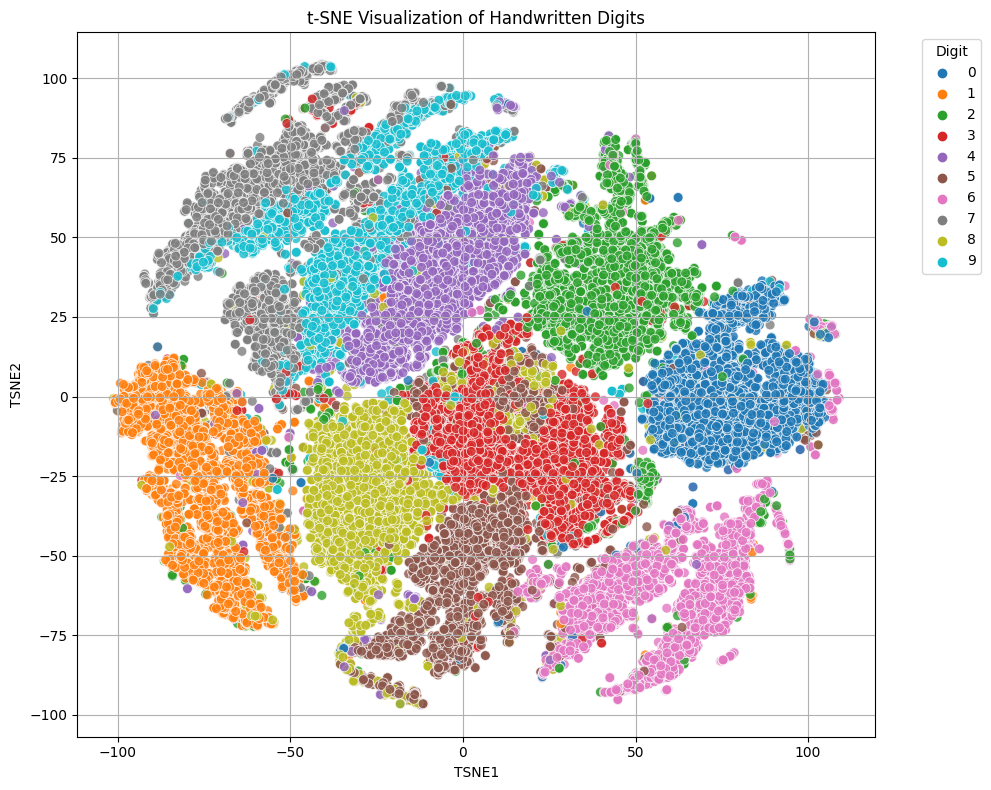

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

tsne_df = pd.DataFrame()
tsne_df['TSNE1'] = X_tsne[:, 0]
tsne_df['TSNE2'] = X_tsne[:, 1]
tsne_df['Label'] = y.values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Label', palette='tab10', s=50, alpha=0.8)
plt.title('t-SNE Visualization of Handwritten Digits')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

2025-07-01 08:56:35.668170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751360195.924122      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751360195.998462      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
input_dim = X_train.shape[1]  
encoding_dim = 32

input_img = Input(shape=(input_dim,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

2025-07-01 08:56:51.184891: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = autoencoder.fit(X_train, X_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))


Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: -537537280.0000 - val_loss: -43290734592.0000
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -679046414336.0000 - val_loss: -11328946176000.0000
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -35684861607936.0000 - val_loss: -227714418081792.0000
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: -444425834594304.0000 - val_loss: -1671989831925760.0000
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -2651399275937792.0000 - val_loss: -7268802651750400.0000
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -10209793318846464.0000 - val_loss: -23073191379337216.0000
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -30322514206916608.0000 - val_loss: -59362095912714240.0000
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -74608555503648768.0000 - val_loss: -131774381234847744.0000
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: -1

In [19]:
encoder = Model(inputs=input_img, outputs=encoded)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


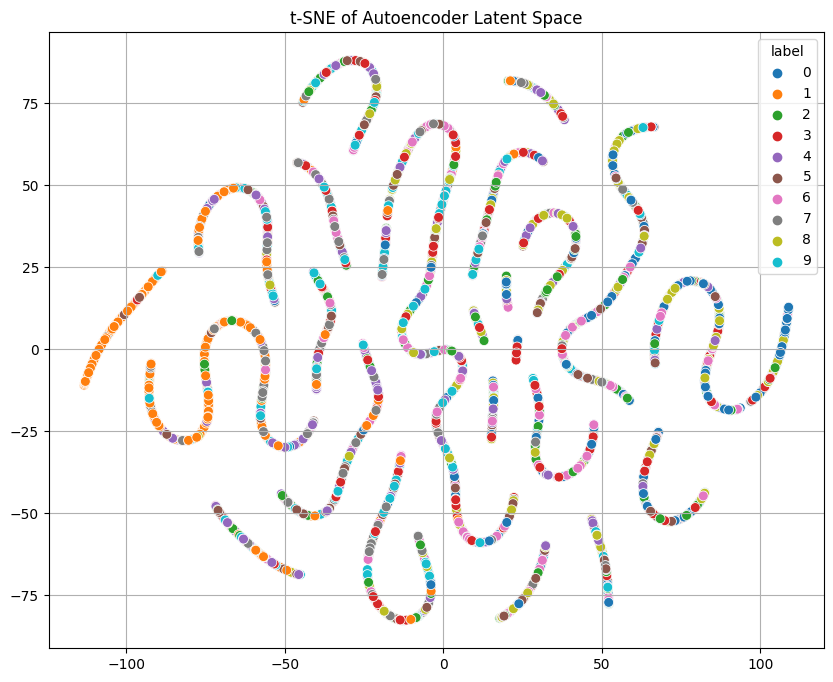

In [20]:
tsne = TSNE(n_components=2, random_state=42)
X_vis = tsne.fit_transform(X_test_encoded)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_test, palette='tab10', s=50)
plt.title("t-SNE of Autoencoder Latent Space")
plt.grid(True)
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [22]:

X_cluster = X_train_encoded   

dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan.fit(X_cluster)


cluster_labels = dbscan.labels_

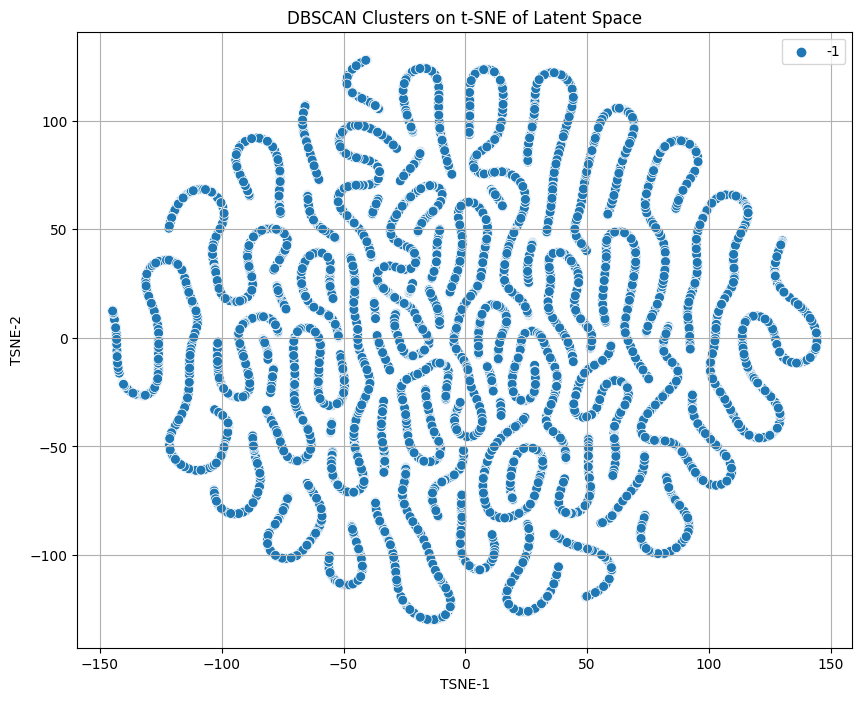

In [23]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_cluster)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette='tab10', s=50, legend='full')
plt.title("DBSCAN Clusters on t-SNE of Latent Space")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.show()